In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = '/Users/xinyue/Desktop/Project 2/North Eastern.csv'
df = pd.read_csv(file_path)
print(df)


                 Unnamed: 0                          Unnamed: 1 Mar 2010  \
0   North Eastern Melbourne  Bundoora-Greensborough-Hurstbridge    2,156   
1                       NaN         Eltham-Research-Montmorency      665   
2                       NaN                Fairfield-Alphington      518   
3                       NaN          Heidelberg-Heidelberg West      970   
4                       NaN                Ivanhoe-Ivanhoe East      520   
5                       NaN                    Mill Park-Epping    1,554   
6                       NaN                           Northcote      931   
7                       NaN                             Preston    1,108   
8                       NaN                           Reservoir    1,581   
9                       NaN                    Thomastown-Lalor      718   
10                      NaN                           Thornbury      906   
11                      NaN                          Whittlesea      251   
12          

In [2]:
# Create a new header row with 'Count' and 'Median' labels starting from the third column
new_header = ['Area', 'Suburb']  # Start with 'Area' and 'Suburb' for the first two columns

# Use a loop to dynamically generate 'Count.1', 'Median.1', 'Count.2', 'Median.2', etc.
count_num = 1  # Initialize count number
median_num = 1  # Initialize median number

# Start from the third column
for i in range(2, len(df.columns)):
    if (i - 2) % 4 == 0:  # Every 4th column should be 'Count'
        new_header.append(f'Count.{count_num}')
        count_num += 1
    elif (i - 2) % 4 == 1:  # Every 2nd column after 'Count' should be 'Median'
        new_header.append(f'Median.{median_num}')
        median_num += 1
    elif (i - 2) % 4 == 2:  # Every 2nd column should be 'Count'
        new_header.append(f'Count.{count_num}')
        count_num += 1
    else:  # Remaining columns are 'Median'
        new_header.append(f'Median.{median_num}')
        median_num += 1

# Assign the new header row to the DataFrame columns
df.columns = new_header

# Display the updated DataFrame
print(df)

                       Area                              Suburb Count.1  \
0   North Eastern Melbourne  Bundoora-Greensborough-Hurstbridge   2,156   
1                       NaN         Eltham-Research-Montmorency     665   
2                       NaN                Fairfield-Alphington     518   
3                       NaN          Heidelberg-Heidelberg West     970   
4                       NaN                Ivanhoe-Ivanhoe East     520   
5                       NaN                    Mill Park-Epping   1,554   
6                       NaN                           Northcote     931   
7                       NaN                             Preston   1,108   
8                       NaN                           Reservoir   1,581   
9                       NaN                    Thomastown-Lalor     718   
10                      NaN                           Thornbury     906   
11                      NaN                          Whittlesea     251   
12                      N

In [3]:
# Filter out the columns that contain 'Median' in their name to get the median rental prices
median_columns = [col for col in df.columns if 'Median' in col]

# Extract only the 'Median' columns along with the 'Suburb' column
median_data = df[['Suburb'] + median_columns].copy()

print(median_data)

                                Suburb Median.1 Median.2 Median.3 Median.4  \
0   Bundoora-Greensborough-Hurstbridge  $322.00  $330.00  $335.00  $340.00   
1          Eltham-Research-Montmorency  $340.00  $340.00  $350.00  $353.00   
2                 Fairfield-Alphington  $300.00  $310.00  $320.00  $320.00   
3           Heidelberg-Heidelberg West  $320.00  $330.00  $330.00  $335.00   
4                 Ivanhoe-Ivanhoe East  $350.00  $350.00  $350.00  $353.00   
5                     Mill Park-Epping  $320.00  $320.00  $330.00  $330.00   
6                            Northcote  $390.00  $390.00  $400.00  $400.00   
7                              Preston  $330.00  $330.00  $340.00  $350.00   
8                            Reservoir  $290.00  $300.00  $300.00  $300.00   
9                     Thomastown-Lalor  $290.00  $290.00  $300.00  $300.00   
10                           Thornbury  $300.00  $300.00  $310.00  $301.00   
11                          Whittlesea  $325.00  $330.00  $335.0

In [4]:
# Convert each median rental price column to numeric, removing non-numeric characters
for col in median_data.columns:
    if 'Median' in col:
        # Remove any dollar signs or non-numeric characters and convert to numeric
        median_data[col] = pd.to_numeric(median_data[col].astype(str).str.replace('[\$,]', '', regex=True), errors='coerce')
print(median_data)

                                Suburb  Median.1  Median.2  Median.3  \
0   Bundoora-Greensborough-Hurstbridge     322.0     330.0     335.0   
1          Eltham-Research-Montmorency     340.0     340.0     350.0   
2                 Fairfield-Alphington     300.0     310.0     320.0   
3           Heidelberg-Heidelberg West     320.0     330.0     330.0   
4                 Ivanhoe-Ivanhoe East     350.0     350.0     350.0   
5                     Mill Park-Epping     320.0     320.0     330.0   
6                            Northcote     390.0     390.0     400.0   
7                              Preston     330.0     330.0     340.0   
8                            Reservoir     290.0     300.0     300.0   
9                     Thomastown-Lalor     290.0     290.0     300.0   
10                           Thornbury     300.0     300.0     310.0   
11                          Whittlesea     325.0     330.0     335.0   
12                         Group Total     320.0     320.0     3

<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
/var/folders/_s/4j24gf8n0ls5dt1yjm000kbr0000gn/T/ipykernel_58635/4014745995.py:5: SyntaxWarning: invalid escape sequence '\$'
  median_data[col] = pd.to_numeric(median_data[col].astype(str).str.replace('[\$,]', '', regex=True), errors='coerce')


In [5]:
# Round the 'Median' columns to the nearest integer and convert to integer type
for col in median_columns:
    median_data[col] = median_data[col].round().astype('Int64')  # Use 'Int64' to allow for NaN values

# Print the converted data to ensure that all columns have been properly converted
print("Median Data after conversion to integers:")
print(median_data.head())

Median Data after conversion to integers:
                               Suburb  Median.1  Median.2  Median.3  Median.4  \
0  Bundoora-Greensborough-Hurstbridge       322       330       335       340   
1         Eltham-Research-Montmorency       340       340       350       353   
2                Fairfield-Alphington       300       310       320       320   
3          Heidelberg-Heidelberg West       320       330       330       335   
4                Ivanhoe-Ivanhoe East       350       350       350       353   

   Median.5  Median.6  Median.7  Median.8  Median.9  ...  Median.32  \
0       340       350       350       350       350  ...        380   
1       360       360       360       365       365  ...        430   
2       320       320       325       323       330  ...        395   
3       335       340       340       350       350  ...        400   
4       360       370       380       385       392  ...        450   

   Median.33  Median.34  Median.35  Median.3

Growth trend for Bundoora-Greensborough-Hurstbridge:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
0      <NA>  2.484472  1.515152  1.492537       0.0  2.941176       0.0   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
0       0.0       0.0        0.0  ...   1.315789   1.298701        0.0   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
0   1.282051   1.265823        0.0        0.0        0.0       10.0   

   Average Growth Rate (%)  
0                 0.798323  

[1 rows x 42 columns]


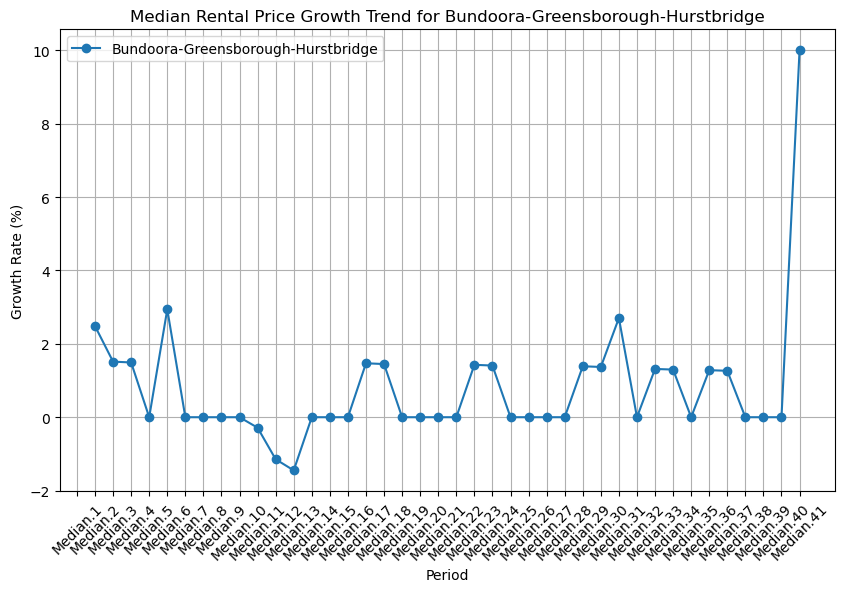

Growth trend for Eltham-Research-Montmorency:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
1      <NA>       0.0  2.941176  0.857143  1.983003       0.0       0.0   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
1  1.388889       0.0  -1.369863  ...   2.325581        0.0   2.272727   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
1        0.0        0.0        0.0        0.0        0.0  11.111111   

   Average Growth Rate (%)  
1                 0.988689  

[1 rows x 42 columns]


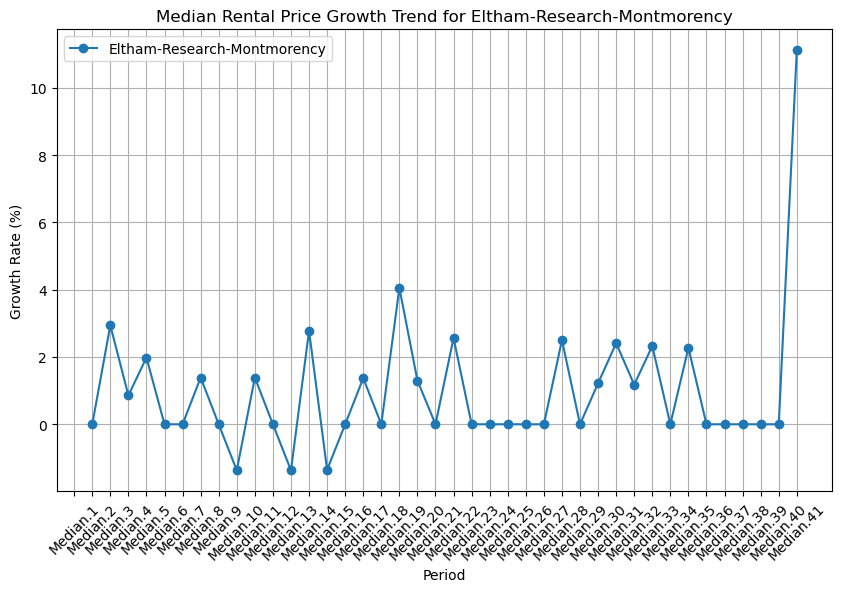

Growth trend for Fairfield-Alphington:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
2      <NA>  3.333333  3.225806       0.0       0.0       0.0    1.5625   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
2 -0.615385  2.167183        0.0  ...   1.265823        0.0        2.5   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
2        0.0   2.439024   4.761905   2.272727   2.222222 -13.043478   

   Average Growth Rate (%)  
2                 0.759529  

[1 rows x 42 columns]


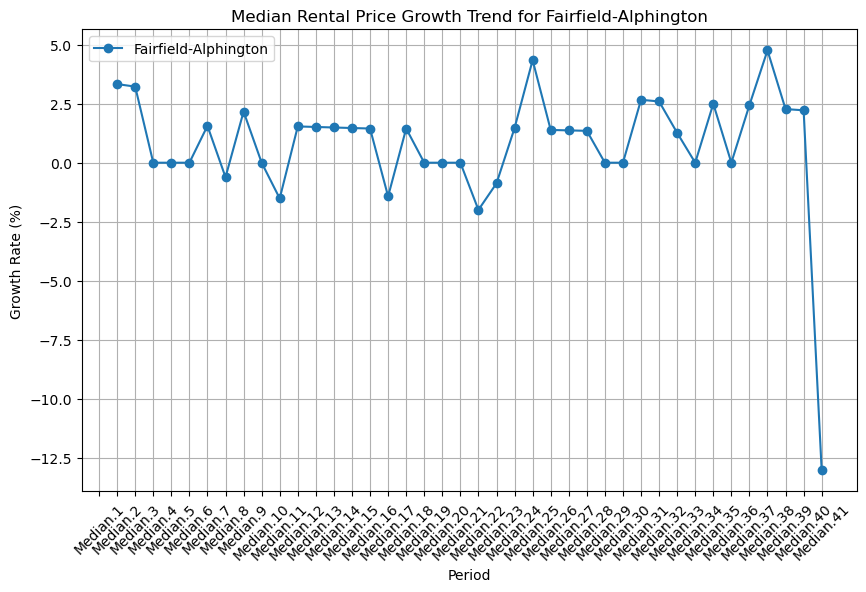

Growth trend for Heidelberg-Heidelberg West:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
3      <NA>     3.125       0.0  1.515152       0.0  1.492537       0.0   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
3  2.941176       0.0        0.0  ...        0.0        2.5   2.439024   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
3  -2.380952   2.439024        0.0        0.0        0.0   7.142857   

   Average Growth Rate (%)  
3                 0.867864  

[1 rows x 42 columns]


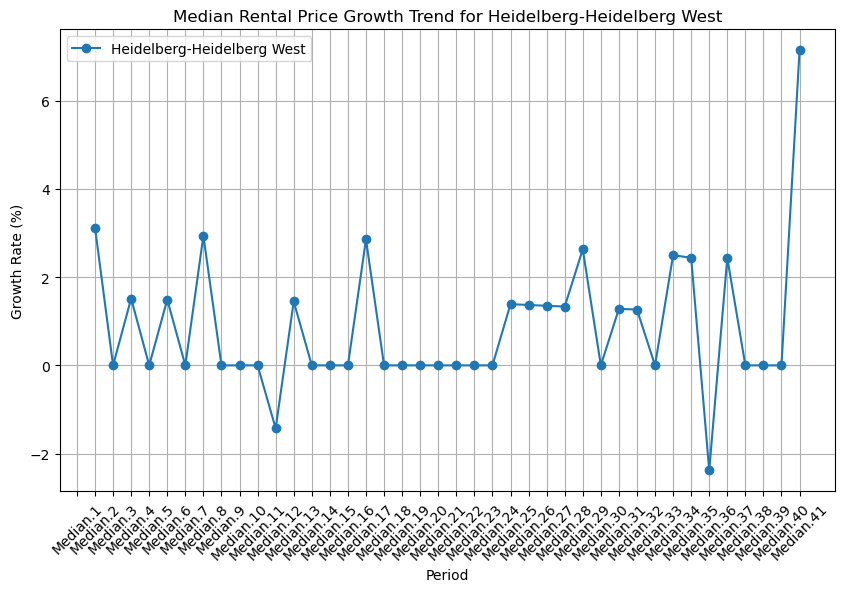

Growth trend for Ivanhoe-Ivanhoe East:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
4      <NA>       0.0       0.0  0.857143  1.983003  2.777778  2.702703   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
4  1.315789  1.818182  -0.510204  ...        0.0        0.0   2.222222   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
4  -2.173913   2.222222   0.652174  -0.647948        0.0   2.173913   

   Average Growth Rate (%)  
4                 0.749598  

[1 rows x 42 columns]


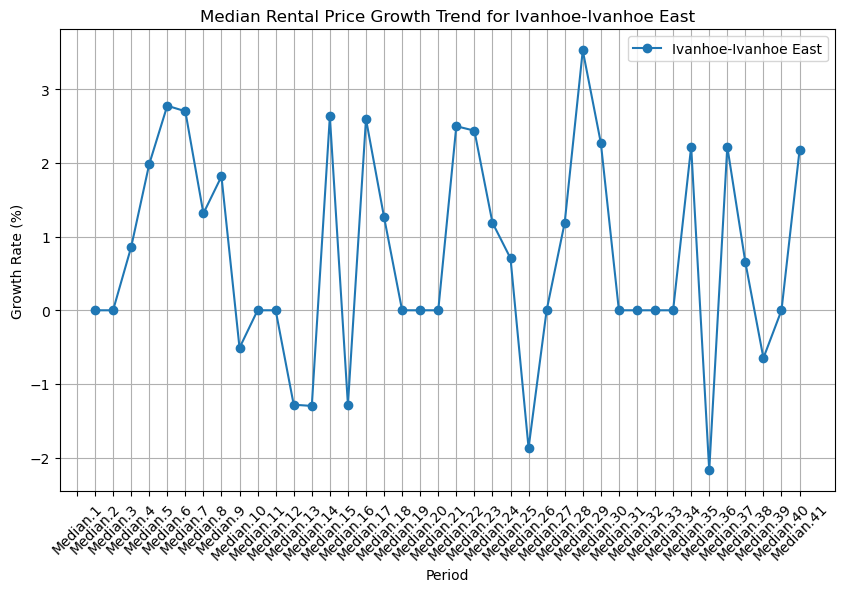

Growth trend for Mill Park-Epping:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
5      <NA>       0.0     3.125       0.0       0.0       0.0       0.0   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
5  1.515152       0.0  -1.492537  ...        0.0   1.388889   1.369863   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
5        0.0        0.0        0.0   0.810811   0.536193   9.333333   

   Average Growth Rate (%)  
5                  0.63485  

[1 rows x 42 columns]


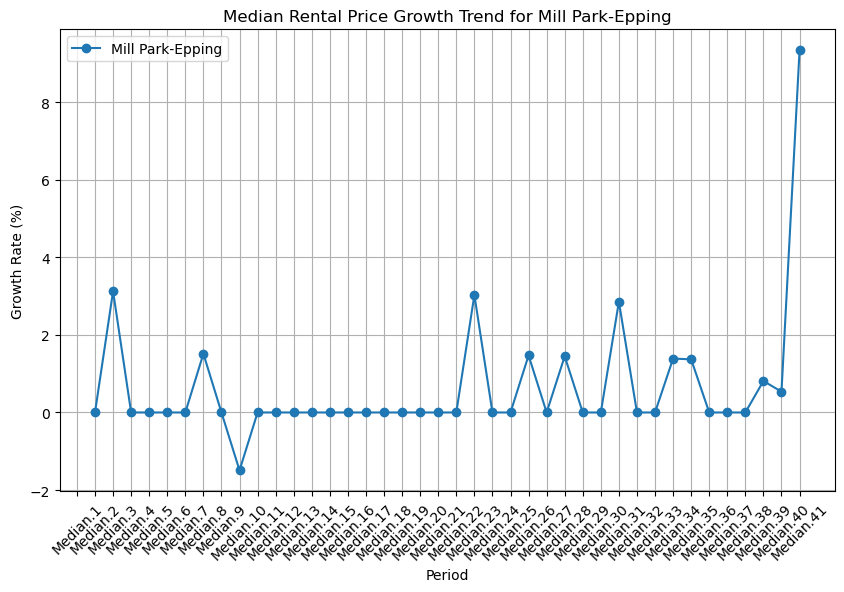

Growth trend for Northcote:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
6      <NA>       0.0  2.564103       0.0       0.0       2.5       0.0   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
6  2.439024  2.380952        0.0  ...   1.052632      3.125   1.010101   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
6        0.0        0.0        0.0        0.0        0.0        2.0   

   Average Growth Rate (%)  
6                 0.680541  

[1 rows x 42 columns]


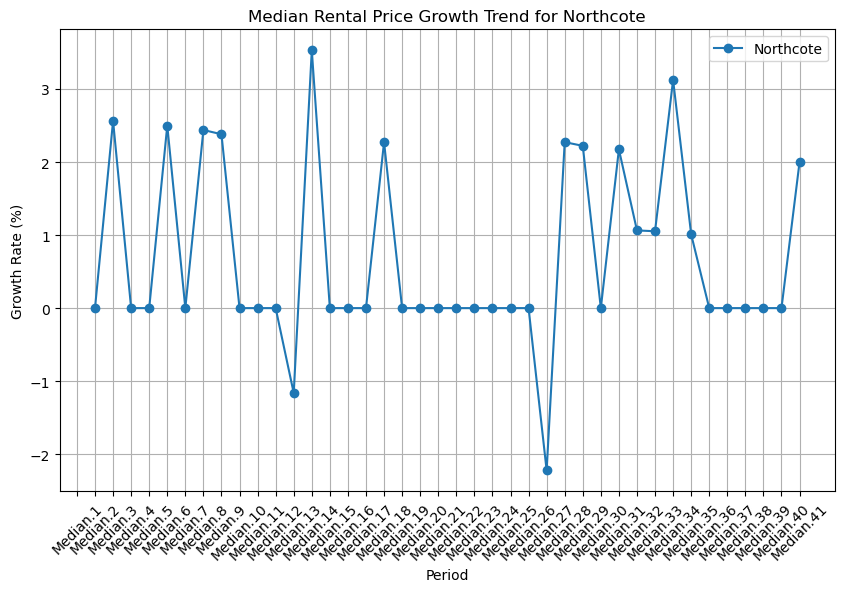

Growth trend for Preston:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
7      <NA>       0.0  3.030303  2.941176       0.0       0.0       0.0   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
7       0.0  2.285714  -2.234637  ...        2.5   1.219512   1.204819   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
7        0.0        0.0   2.380952  -2.325581   2.380952   4.651163   

   Average Growth Rate (%)  
7                 0.787981  

[1 rows x 42 columns]


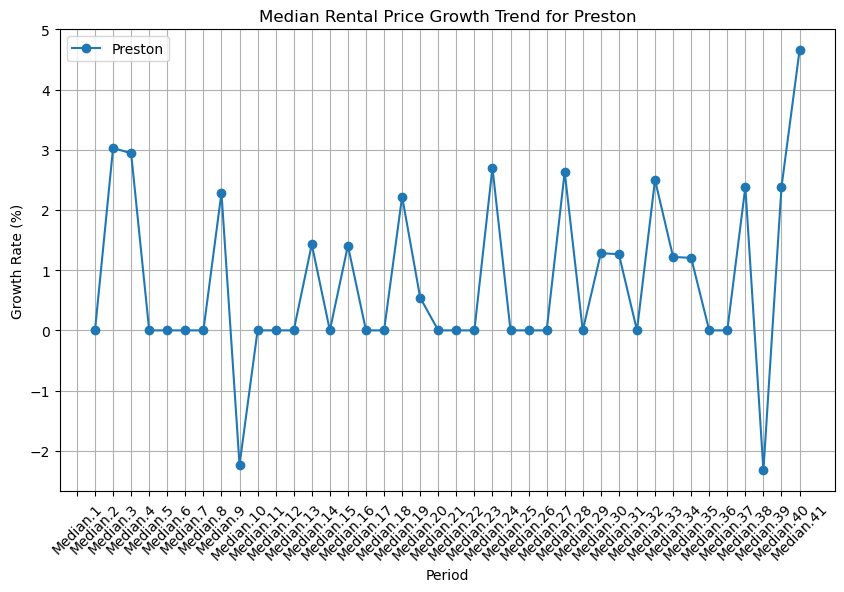

Growth trend for Reservoir:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
8      <NA>  3.448276       0.0       0.0  3.333333       0.0       0.0   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
8  1.612903       0.0        0.0  ...        0.0   2.777778        0.0   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
8        0.0   2.702703        0.0        0.0        0.0   6.578947   

   Average Growth Rate (%)  
8                 0.850018  

[1 rows x 42 columns]


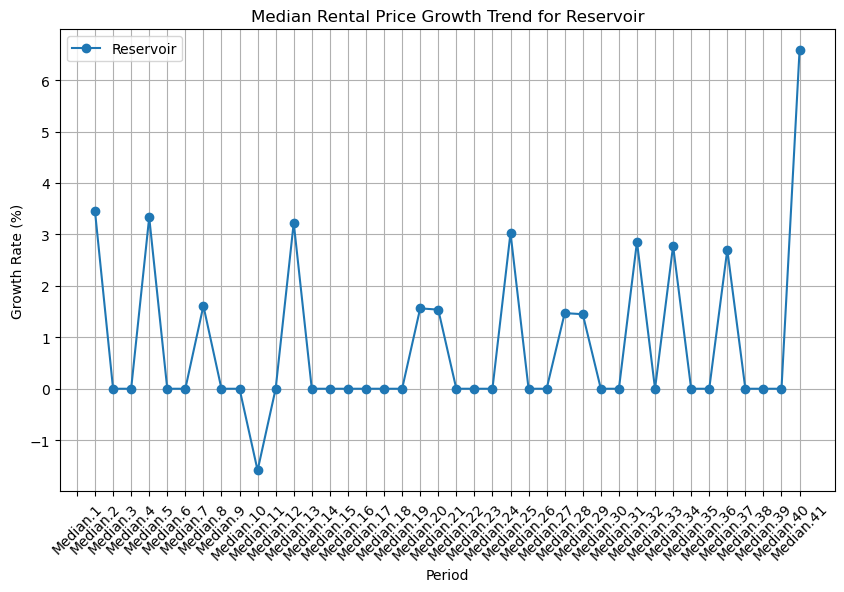

Growth trend for Thomastown-Lalor:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
9      <NA>       0.0  3.448276       0.0       0.0       0.0       0.0   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
9       0.0  1.666667  -1.639344  ...        0.0        0.0   2.857143   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
9        0.0        0.0        0.0        0.0        0.0   6.944444   

   Average Growth Rate (%)  
9                 0.724373  

[1 rows x 42 columns]


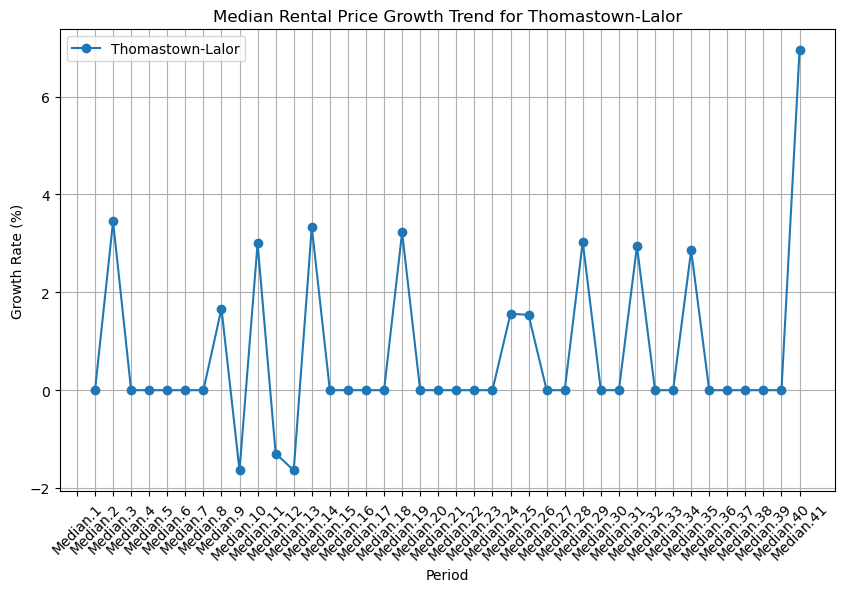

Growth trend for Thornbury:
    Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
10      <NA>       0.0  3.333333 -2.903226 -0.332226       0.0       0.0   

    Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
10  6.666667     3.125   3.030303  ...        2.5        0.0   2.439024   

    Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
10        0.0  -1.666667   1.694915   1.190476        0.0   1.176471   

    Average Growth Rate (%)  
10                 0.922299  

[1 rows x 42 columns]


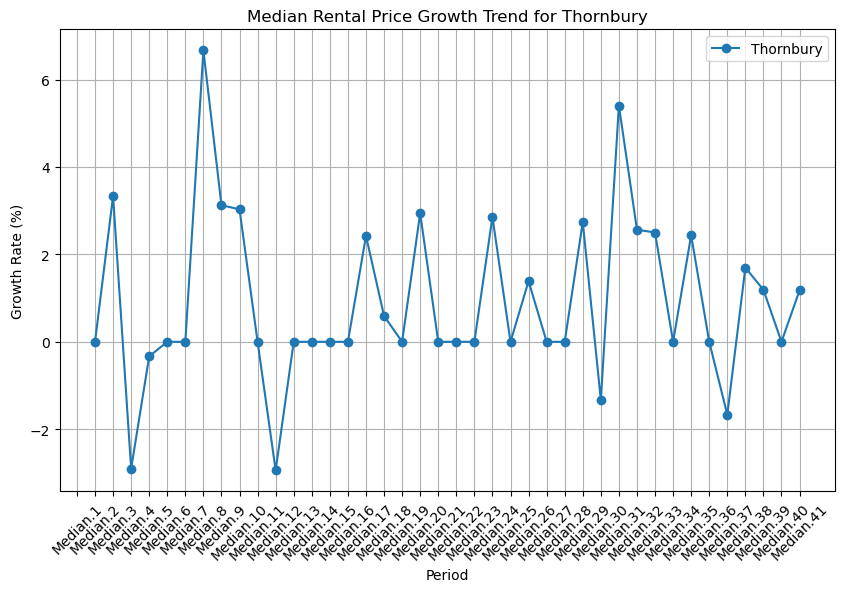

Growth trend for Whittlesea:
    Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
11      <NA>  1.538462  1.515152  1.492537  2.941176       0.0       0.0   

    Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
11       0.0 -1.428571  -2.898551  ...   1.388889   1.369863   1.351351   

    Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
11   1.333333        0.0        0.0        0.0   2.631579  12.820513   

    Average Growth Rate (%)  
11                  0.78423  

[1 rows x 42 columns]


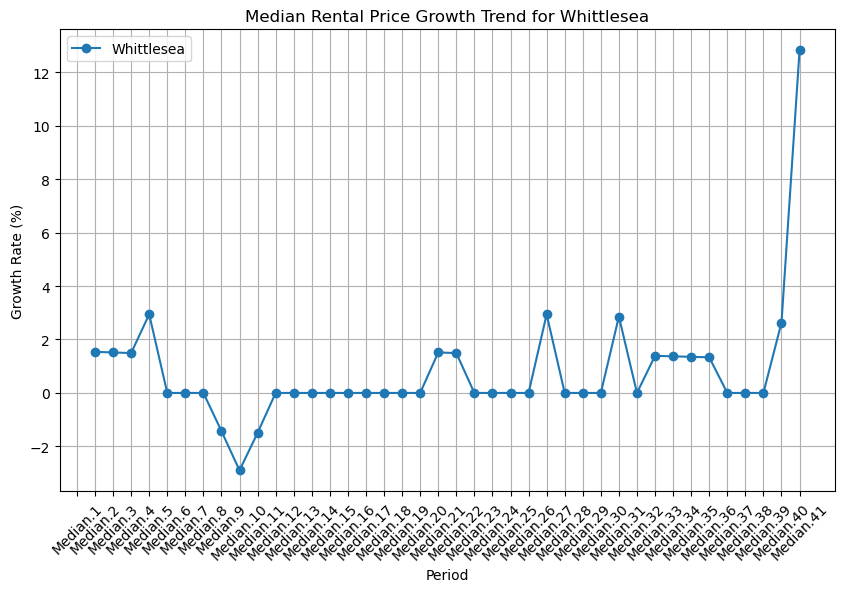

Growth trend for Group Total:
    Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
12      <NA>       0.0     3.125       0.0       0.0  1.515152  1.492537   

    Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
12       0.0       0.0        0.0  ...        0.0   2.631579        0.0   

    Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
12   1.282051   1.265823        0.0        0.0        0.0        7.5   

    Average Growth Rate (%)  
12                 0.750787  

[1 rows x 42 columns]


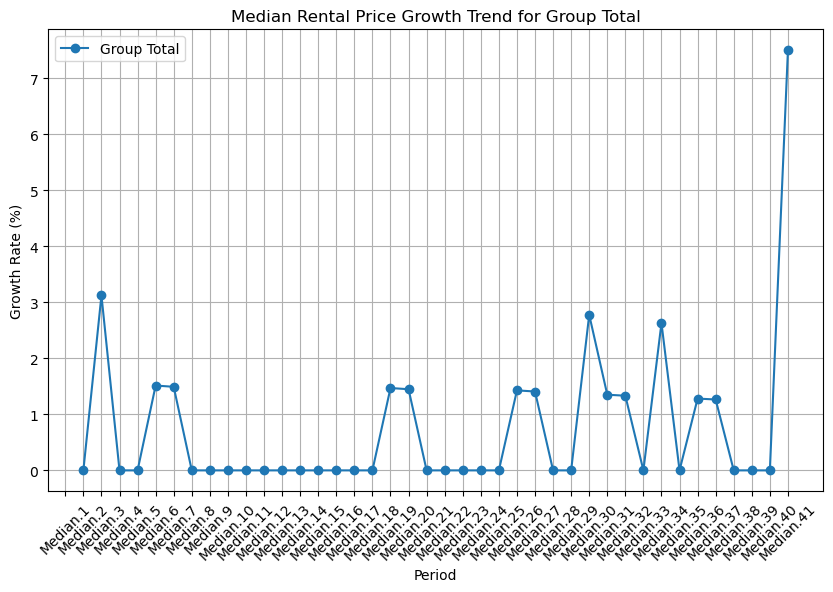

All suburbs growth trends:
    Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
0       <NA>  2.484472  1.515152  1.492537       0.0  2.941176       0.0   
1       <NA>       0.0  2.941176  0.857143  1.983003       0.0       0.0   
2       <NA>  3.333333  3.225806       0.0       0.0       0.0    1.5625   
3       <NA>     3.125       0.0  1.515152       0.0  1.492537       0.0   
4       <NA>       0.0       0.0  0.857143  1.983003  2.777778  2.702703   
5       <NA>       0.0     3.125       0.0       0.0       0.0       0.0   
6       <NA>       0.0  2.564103       0.0       0.0       2.5       0.0   
7       <NA>       0.0  3.030303  2.941176       0.0       0.0       0.0   
8       <NA>  3.448276       0.0       0.0  3.333333       0.0       0.0   
9       <NA>       0.0  3.448276       0.0       0.0       0.0       0.0   
10      <NA>       0.0  3.333333 -2.903226 -0.332226       0.0       0.0   
11      <NA>  1.538462  1.515152  1.492537  2.941176       0.

In [6]:
import matplotlib.pyplot as plt
# Calculate the growth rate for each suburb separately and plot them
growth_trends = pd.DataFrame()

for suburb in median_data['Suburb'].unique():
    # Filter the data for the specific suburb
    suburb_data = median_data[median_data['Suburb'] == suburb].copy()

    # Calculate the percentage change in the median rental prices across the periods
    suburb_data_growth = suburb_data[median_columns].pct_change(axis='columns') * 100

    # Calculate cumulative growth or average growth as needed (here, taking the mean growth rate)
    suburb_data_growth['Average Growth Rate (%)'] = suburb_data_growth.mean(axis=1)

    # Append the results to the main DataFrame
    growth_trends = pd.concat([growth_trends, suburb_data_growth], ignore_index=True)

    # Print the growth trend for the suburb
    print(f"Growth trend for {suburb}:")
    print(suburb_data_growth)

    # Plotting the growth trend for the current suburb
    plt.figure(figsize=(10, 6))
    plt.plot(suburb_data_growth.columns[:-1], suburb_data_growth.iloc[0, :-1], marker='o', linestyle='-', label=suburb)
    plt.title(f'Median Rental Price Growth Trend for {suburb}')
    plt.xlabel('Period')
    plt.ylabel('Growth Rate (%)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

# Optional: Print all the growth trends for all suburbs
print("All suburbs growth trends:")
print(growth_trends)

In [7]:
# Find the suburb with the highest average growth rate
print(growth_trends['Average Growth Rate (%)'])

# max_growth_suburb = growth_trends[growth_trends['Average Growth Rate (%)'] == growth_trends['Average Growth Rate (%)'].max()]
# print(max_growth_suburb)
# print("Suburb with the highest average growth rate:")
# print(max_growth_suburb[['Suburb', 'Average Growth Rate (%)']])

0     0.798323
1     0.988689
2     0.759529
3     0.867864
4     0.749598
5      0.63485
6     0.680541
7     0.787981
8     0.850018
9     0.724373
10    0.922299
11     0.78423
12    0.750787
Name: Average Growth Rate (%), dtype: Float64


In [9]:
print(df["Suburb"])

0     Bundoora-Greensborough-Hurstbridge
1            Eltham-Research-Montmorency
2                   Fairfield-Alphington
3             Heidelberg-Heidelberg West
4                   Ivanhoe-Ivanhoe East
5                       Mill Park-Epping
6                              Northcote
7                                Preston
8                              Reservoir
9                       Thomastown-Lalor
10                             Thornbury
11                            Whittlesea
12                           Group Total
Name: Suburb, dtype: object
